In [131]:
# import libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway

sb.set()

In [2]:
#read dataset
breastCancerdf = pd.read_csv('breastCancer.csv')


breastCancerdf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
breastCancerdf.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [79]:
breastCancerdf.drop(columns='Unnamed: 32')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [92]:
breastCancerdf_mean = breastCancerdf.iloc[:, :12]

breastCancerdf_mean.dropna(inplace=True)

In [111]:
#extract the relevant columns and clean data for dec tree classifier
diagnosis = pd.DataFrame(breastCancerdf_mean['diagnosis'])
# diagnosis = diagnosis.replace({'Diagnosis' : {'M':True, 'B': False}})
radius_mean = pd.DataFrame(breastCancerdf_mean['radius_mean'])
texture_mean = pd.DataFrame(breastCancerdf_mean['texture_mean'])
perimeter_mean = pd.DataFrame(breastCancerdf_mean['perimeter_mean'])
area_mean = pd.DataFrame(breastCancerdf_mean['area_mean'])
smoothness_mean = pd.DataFrame(breastCancerdf_mean['smoothness_mean'])
compactness_mean = pd.DataFrame(breastCancerdf_mean['compactness_mean'])
concavity_mean = pd.DataFrame(breastCancerdf_mean['concavity_mean'])
concave_mean = pd.DataFrame(breastCancerdf_mean['concave points_mean'])
symmetry_mean = pd.DataFrame(breastCancerdf_mean['symmetry_mean'])
fractal_mean = pd.DataFrame(breastCancerdf_mean['fractal_dimension_mean'])

# radius_mean.describe()



,radius_mean
count,569.000000
mean,14.127292
std,3.524049
min,6.981000
25%,11.700000
50%,13.370000
75%,15.780000
max,28.110000


In [94]:
# set up the train and test sets
# Set up the train/test set (80/20 split)

diagnosis_train, diagnosis_test, radius_train, radius_test = train_test_split(diagnosis, radius_mean, train_size=0.8)
diagnosis_train, diagnosis_test, texture_train, texture_test = train_test_split(diagnosis, texture_mean, train_size=0.8)
diagnosis_train, diagnosis_test, perimeter_train, perimeter_test = train_test_split(diagnosis, perimeter_mean, train_size=0.8)
diagnosis_train, diagnosis_test, area_train, area_test = train_test_split(diagnosis, area_mean, train_size=0.8)
diagnosis_train, diagnosis_test, smoothness_train, smoothness_test = train_test_split(diagnosis, smoothness_mean, train_size=0.8)
diagnosis_train, diagnosis_test, compactness_train, compactness_test = train_test_split(diagnosis, compactness_mean, train_size=0.8)
diagnosis_train, diagnosis_test, concavity_train, concavity_test = train_test_split(diagnosis, concavity_mean, train_size=0.8)
diagnosis_train, diagnosis_test, concave_train, concave_test = train_test_split(diagnosis, concave_mean, train_size=0.8)
diagnosis_train, diagnosis_test, symmetry_train, symmetry_test = train_test_split(diagnosis, symmetry_mean, train_size=0.8)
diagnosis_train, diagnosis_test, fractal_train, fractal_test = train_test_split(diagnosis, fractal_mean, train_size=0.8)


In [103]:
selected_categories = ["M", "B"]

diagnosis_radius = pd.concat([radius_train, diagnosis_train], axis = 1).reindex(radius_train.index)
diagnosis_radius = diagnosis_radius[diagnosis_radius["diagnosis"].isin(selected_categories)]

diagnosis_texture = pd.concat([texture_train, diagnosis_train], axis = 1).reindex(texture_train.index)
diagnosis_radius = diagnosis_radius[diagnosis_radius["diagnosis"].isin(selected_categories)]

diagnosis_perimeter = pd.concat([perimeter_train, diagnosis_train], axis = 1).reindex(perimeter_train.index)
diagnosis_perimeter = diagnosis_perimeter[diagnosis_perimeter["diagnosis"].isin(selected_categories)]

diagnosis_area = pd.concat([area_train, diagnosis_train], axis = 1).reindex(area_train.index)
diagnosis_area = diagnosis_area[diagnosis_area["diagnosis"].isin(selected_categories)]

diagnosis_smoothness = pd.concat([smoothness_train, diagnosis_train], axis = 1).reindex(smoothness_train.index)
diagnosis_smoothness = diagnosis_smoothness[diagnosis_smoothness["diagnosis"].isin(selected_categories)]

diagnosis_compactness = pd.concat([compactness_train, diagnosis_train], axis = 1).reindex(compactness_train.index)
diagnosis_compactness = diagnosis_compactness[diagnosis_compactness["diagnosis"].isin(selected_categories)]

diagnosis_concavity = pd.concat([concavity_train, diagnosis_train], axis = 1).reindex(concavity_train.index)
diagnosis_concavity = diagnosis_concavity[diagnosis_concavity["diagnosis"].isin(selected_categories)]

diagnosis_concave = pd.concat([concave_train, diagnosis_train], axis = 1).reindex(concave_train.index)
diagnosis_concave = diagnosis_concave[diagnosis_concave["diagnosis"].isin(selected_categories)]

diagnosis_symmetry = pd.concat([symmetry_train, diagnosis_train], axis = 1).reindex(symmetry_train.index)
diagnosis_symmetry = diagnosis_symmetry[diagnosis_symmetry["diagnosis"].isin(selected_categories)]

diagnosis_fractal = pd.concat([fractal_train, diagnosis_train], axis = 1).reindex(fractal_train.index)
diagnosis_fractal = diagnosis_fractal[diagnosis_fractal["diagnosis"].isin(selected_categories)]


# print(diagnosis_radius["diagnosis"].isnull().values.any())




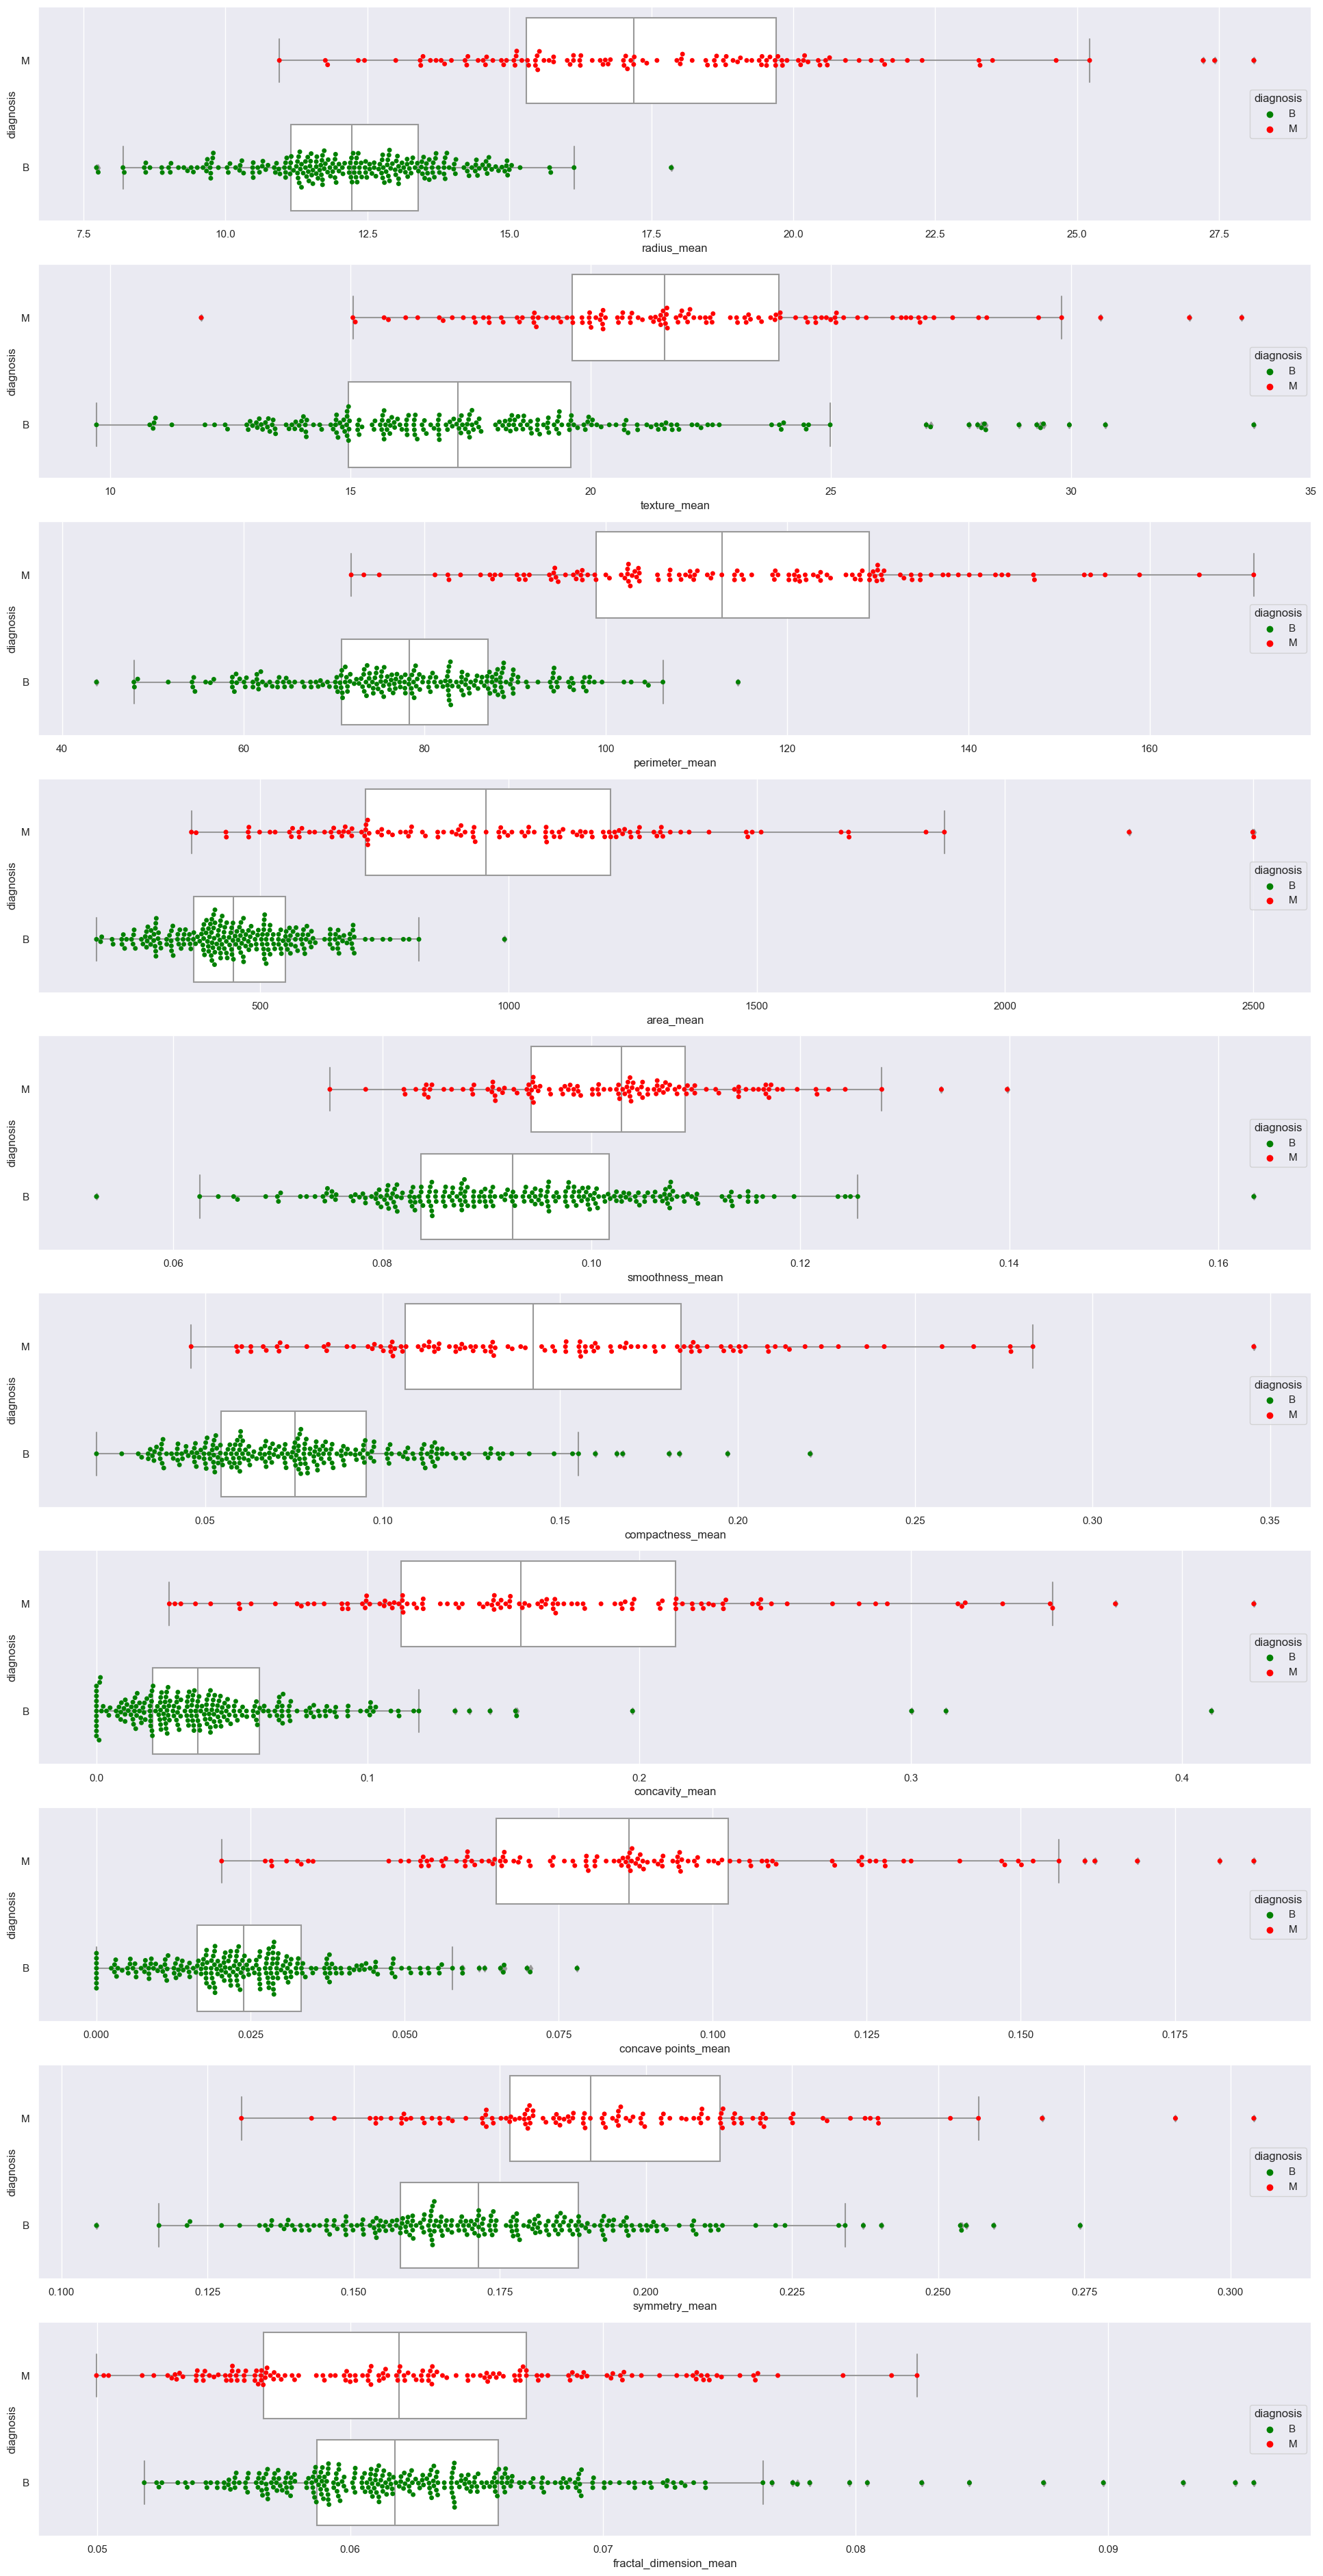

In [129]:
f, axes = plt.subplots(10, 1, figsize=(24, 48))




sb.swarmplot(x = "radius_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_radius, orient = "h", ax=axes[0], order=['M', 'B'])
sb.boxplot(x = "radius_mean",y = "diagnosis", color="white", data = diagnosis_radius, orient = "h", ax=axes[0], order=['M', 'B'])

sb.swarmplot(x = "texture_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_texture, orient = "h", ax=axes[1], order=['M', 'B'])
sb.boxplot(x = "texture_mean",y = "diagnosis", color="white", data = diagnosis_texture, orient = "h", ax=axes[1], order=['M', 'B'])

sb.swarmplot(x = "perimeter_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_perimeter, orient = "h", ax=axes[2], order=['M', 'B'])
sb.boxplot(x = "perimeter_mean",y = "diagnosis", color="white", data = diagnosis_perimeter, orient = "h", ax=axes[2], order=['M', 'B'])

sb.swarmplot(x = "area_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_area, orient = "h", ax=axes[3], order=['M', 'B'])
sb.boxplot(x = "area_mean",y = "diagnosis", color="white", data = diagnosis_area, orient = "h", ax=axes[3], order=['M', 'B'])

sb.swarmplot(x = "smoothness_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_smoothness, orient = "h", ax=axes[4], order=['M', 'B'])
sb.boxplot(x = "smoothness_mean",y = "diagnosis", color="white", data = diagnosis_smoothness, orient = "h", ax=axes[4], order=['M', 'B'])

sb.swarmplot(x = "compactness_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_compactness, orient = "h", ax=axes[5], order=['M', 'B'])
sb.boxplot(x = "compactness_mean",y = "diagnosis", color="white", data = diagnosis_compactness, orient = "h", ax=axes[5], order=['M', 'B'])

sb.swarmplot(x = "concavity_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_concavity, orient = "h", ax=axes[6], order=['M', 'B'])
sb.boxplot(x = "concavity_mean",y = "diagnosis", color="white", data = diagnosis_concavity, orient = "h", ax=axes[6], order=['M', 'B'])

sb.swarmplot(x = "concave points_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_concave, orient = "h", ax=axes[7], order=['M', 'B'])
sb.boxplot(x = "concave points_mean",y = "diagnosis", color="white", data = diagnosis_concave, orient = "h", ax=axes[7], order=['M', 'B'])

sb.swarmplot(x = "symmetry_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_symmetry, orient = "h", ax=axes[8], order=['M', 'B'])
sb.boxplot(x = "symmetry_mean",y = "diagnosis", color="white", data = diagnosis_symmetry, orient = "h", ax=axes[8], order=['M', 'B'])

sb.swarmplot(x = "fractal_dimension_mean", hue='diagnosis',hue_order=['B', 'M'], palette=['green', 'red'], y = "diagnosis", data = diagnosis_fractal, orient = "h", ax=axes[9], order=['M', 'B'])
sb.boxplot(x = "fractal_dimension_mean",y = "diagnosis", color="white", data = diagnosis_fractal, orient = "h", ax=axes[9], order=['M', 'B'])

for i in range(0,10):
    sb.move_legend(axes[i], "right")



In [146]:
# ANOVA Test
corr_dict = {}

radiusList=diagnosis_radius.groupby('diagnosis')['radius_mean'].apply(list)
radiusResults = f_oneway(*radiusList)
corr_dict['radius_mean'] = radiusResults[1]


textureList=diagnosis_texture.groupby('diagnosis')['texture_mean'].apply(list)
textureResults = f_oneway(*textureList)
corr_dict['texture_mean'] = textureResults[1]


perimeterList=diagnosis_perimeter.groupby('diagnosis')['perimeter_mean'].apply(list)
perimeterResults = f_oneway(*perimeterList)
corr_dict['perimeter_mean'] = perimeterResults[1]


areaList=diagnosis_area.groupby('diagnosis')['area_mean'].apply(list)
areaResults = f_oneway(*areaList)
corr_dict['area_mean'] = areaResults[1]


smoothnessList=diagnosis_smoothness.groupby('diagnosis')['smoothness_mean'].apply(list)
smoothnessResults = f_oneway(*smoothnessList)
corr_dict['smoothness_mean'] = smoothnessResults[1]


compactnessList=diagnosis_compactness.groupby('diagnosis')['compactness_mean'].apply(list)
compactnessResults = f_oneway(*compactnessList)
corr_dict['compactness_mean'] = compactnessResults[1]


concavityList=diagnosis_concavity.groupby('diagnosis')['concavity_mean'].apply(list)
concavityResults = f_oneway(*concavityList)
corr_dict['concavity_mean'] = concavityResults[1]


concaveList=diagnosis_concave.groupby('diagnosis')['concave points_mean'].apply(list)
concaveResults = f_oneway(*concaveList)
corr_dict['concave points_mean'] = concaveResults[1]


symmetryList=diagnosis_symmetry.groupby('diagnosis')['symmetry_mean'].apply(list)
symmetryResults = f_oneway(*symmetryList)
corr_dict['symmetry_mean'] = symmetryResults[1]


fractalList=diagnosis_fractal.groupby('diagnosis')['fractal_dimension_mean'].apply(list)
fractalResults = f_oneway(*fractalList)
corr_dict['fractal_dimension_mean'] = fractalResults[1]


corr_dict = sorted(corr_dict.items(), key=lambda x:x[1])

corrDf = pd.DataFrame(corr_dict)
corrDf.rename(columns={0:'feature', 1:'P-value'}, inplace=True)

# print(corr_dict)
corrDf



,feature,P-value
0,concave points_mean,1.374426e-76
1,perimeter_mean,6.457298e-66
2,radius_mean,1.791640e-64
3,area_mean,1.203455e-56
4,concavity_mean,6.459264e-53
5,compactness_mean,2.027160e-39
6,texture_mean,2.207701e-18
7,symmetry_mean,5.441516e-11
8,smoothness_mean,9.237237e-10
9,fractal_dimension_mean,5.614945e-01


To determine whether or not a numerical variable is correlated to a categorical variable, we can perform an ANOVA hypothesis test. This was the most suitable in our case as our data set comprised of a categorical target variable (Whether or not the diagnosis was MALIGNANT or BENIGN), and other numerical predictors, such as perimeter, area, etc. The full list of features and their descriptions can be found in data_description.txt.

The ANOVA Hypothesis test was conducted with the help of f_oneway in scipy.stats. The P-value is defined as the probability under the assumption of no effect or no difference (null hypothesis), of obtaining a result equal to or more extreme than what was actually observed. Hence, in the selection of the features for model prediction, we decided to rank the features by their P-value, and then selecting the top 3 and top 5 values for use in the classifier.

This is also congruent with a visual confirmation of the swarmplots as plotted above. For example, in the swarm plot for concave points_mean, we see that for a MALIGNANT and a BENIGN tumour, the datapoints are rather distinct, with the box plots being quite far away from each other. On the other hand, for fractal_dimension_mean, we see that the boxplots for MALIGNANT and BENIGN are almost on top of one another. The P-value of 0.5614 confirms this, as we accept the null hypothesis that fractal_dimension_mean is not correlated to the diagnosis of MALIGNANT or BENIGN.

The top 3 features:
(1) concave points_mean 
(2) perimeter_mean
(3) radius_mean

The top 5 features:
(1) concave points_mean
(2) perimeter_mean
(3) radius_mean
(4) area_mean
(5) concavity_mean

References

https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

https://www.google.com/search?q=f_oneway&oq=f_oneway&aqs=chrome..69i57j0i512j0i390i650l3.1629j0j7&sourceid=chrome&ie=UTF-8

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=The%20P%20value%20is%20defined,groups%20is%20due%20to%20chance.


